<a href="https://colab.research.google.com/github/mithlohar144/Air_Quality_Prediction_System/blob/main/day20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Evaluate various time series machine learning models, compare them using MAE, RMSE, and forecast plots, and save the best performing model for inference. Additionally, discuss strategies for training models per city or station if the data is regionalized.

## Load data

### Subtask:
Load the time series data into a pandas DataFrame.


**Reasoning**:
Import the pandas library, read the CSV file into a DataFrame, and display the first few rows.



**Reasoning**:
The previous attempt to read the CSV failed due to a UnicodeDecodeError. This often happens when the file is not encoded in UTF-8. I will try reading the file again, specifying a common alternative encoding, 'latin1'.



In [5]:
df = pd.read_csv('/content/data.csv', encoding='latin1')
display(df.head())

/tmp/ipython-input-4072378719.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/data.csv', encoding='latin1')


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


## Prepare data

### Subtask:
Preprocess the data for time series modeling, including splitting into training and testing sets.


**Reasoning**:
Convert the 'date' column to datetime objects, sort the DataFrame by date, handle missing values by forward filling, select the 'rspm' column as the target variable, and split the data into training and testing sets using an 80/20 split based on date.



In [6]:
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by='date')

# Handle missing values using forward fill
df_filled = df.fillna(method='ffill')

# Select the target variable 'rspm'
df_rspm = df_filled[['date', 'rspm']].copy()

# Split data into training and testing sets (80/20 split based on date)
train_size = int(len(df_rspm) * 0.8)
train_df = df_rspm.iloc[:train_size]
test_df = df_rspm.iloc[train_size:]

display(train_df.head())
display(test_df.head())

/tmp/ipython-input-3110133432.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df.fillna(method='ffill')


,date,rspm
413276,1987-01-01,NaN
413279,1987-01-01,NaN
413282,1987-01-01,NaN
368217,1987-01-01,NaN
80622,1987-01-01,NaN


,date,rspm
246276,2014-03-03,63.0
173455,2014-03-03,73.0
40399,2014-03-03,45.0
339717,2014-03-03,191.0
361290,2014-03-03,53.0


## Define and train models

### Subtask:
Define and train different time series models.


**Reasoning**:
Import the necessary libraries for time series modeling, define and train an ARIMA model and an Exponential Smoothing model on the training data.



In [7]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Define and train ARIMA model
# Using a simple order (5,1,0) as a starting point
arima_model = ARIMA(train_df['rspm'], order=(5, 1, 0))
arima_model_fit = arima_model.fit()
print(arima_model_fit.summary())

# Define and train Exponential Smoothing model
# Using additive trend and seasonal components
es_model = ExponentialSmoothing(train_df['rspm'], seasonal_periods=12, trend='add', seasonal='add')
es_model_fit = es_model.fit()
print(es_model_fit.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   rspm   No. Observations:               348593
Model:                 ARIMA(5, 1, 0)   Log Likelihood            -1876849.741
Date:                Wed, 22 Oct 2025   AIC                        3753711.481
Time:                        06:27:35   BIC                        3753776.051
Sample:                             0   HQIC                       3753730.039
                             - 348593                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7911      0.001  -1239.781      0.000      -0.792      -0.790
ar.L2         -0.6353      0.001   -675.372      0.000      -0.637      -0.633
ar.L3         -0.4813      0.001   -460.434      0.0

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/exponential_smoothing/initialization.py:95: RuntimeWarning: Mean of empty slice
  initial_seasonal = np.nanmean(


ValueError: shapes (2,10) and (0,1) not aligned: 10 (dim 1) != 0 (dim 0)

**Reasoning**:
The Exponential Smoothing model training failed due to a ValueError related to initialization with insufficient data points at the beginning of the time series. This is likely caused by the initial NaN values in the `train_df['rspm']` that were not filled by the forward fill method, as noted in the previous step's summary. To fix this, I will drop the initial rows with NaN values in the 'rspm' column from the training data before training the Exponential Smoothing model. I will also address the ValueWarning by setting the index of the training data to the 'date' column before fitting the models.



In [8]:
# Drop initial NaN values in 'rspm' from the training data for Exponential Smoothing
train_df_cleaned = train_df.dropna(subset=['rspm'])

# Set the date column as the index for both dataframes for time series modeling
train_df_cleaned = train_df_cleaned.set_index('date')
train_df = train_df.set_index('date') # Also set index for ARIMA, although it trained without error

# Define and train ARIMA model on the training data with date index
# Using a simple order (5,1,0) as a starting point
arima_model = ARIMA(train_df['rspm'], order=(5, 1, 0))
arima_model_fit = arima_model.fit()
print("ARIMA Model Summary:")
print(arima_model_fit.summary())

# Define and train Exponential Smoothing model on the cleaned training data with date index
# Using additive trend and seasonal components
es_model = ExponentialSmoothing(train_df_cleaned['rspm'], seasonal_periods=12, trend='add', seasonal='add')
es_model_fit = es_model.fit()
print("\nExponential Smoothing Model Summary:")
print(es_model_fit.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                   rspm   No. Observations:               348593
Model:                 ARIMA(5, 1, 0)   Log Likelihood            -1876849.741
Date:                Wed, 22 Oct 2025   AIC                        3753711.481
Time:                        06:29:15   BIC                        3753776.051
Sample:                             0   HQIC                       3753730.039
                             - 348593                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7911      0.001  -1239.781      0.000      -0.792      -0.790
ar.L2         -0.6353      0.001   -675.372      0.000      -0.637      -0.633
ar.L3         -0.4813      0.00

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/holtwinters/model.py:85: RuntimeWarning: overflow encountered in matmul
  return err.T @ err



Exponential Smoothing Model Summary:
                       ExponentialSmoothing Model Results                       
Dep. Variable:                     rspm   No. Observations:               323661
Model:             ExponentialSmoothing   SSE                     1820131589.300
Optimized:                         True   AIC                        2794754.979
Trend:                         Additive   BIC                        2794925.979
Seasonal:                      Additive   AICC                       2794754.982
Seasonal Periods:                    12   Date:                 Wed, 22 Oct 2025
Box-Cox:                          False   Time:                         06:31:54
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.0204531                alpha         

## Evaluate models

### Subtask:
Evaluate the performance of each trained model using metrics like MAE and RMSE, and generate forecast plots.


**Reasoning**:
Make predictions using the trained models, calculate MAE and RMSE, and generate a plot to visualize the actual vs predicted values.



/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ARIMA MAE: 50.95071580608617
ARIMA RMSE: 65.90190654655576
Exponential Smoothing MAE: 57.560052641112215
Exponential Smoothing RMSE: 70.07247017209484


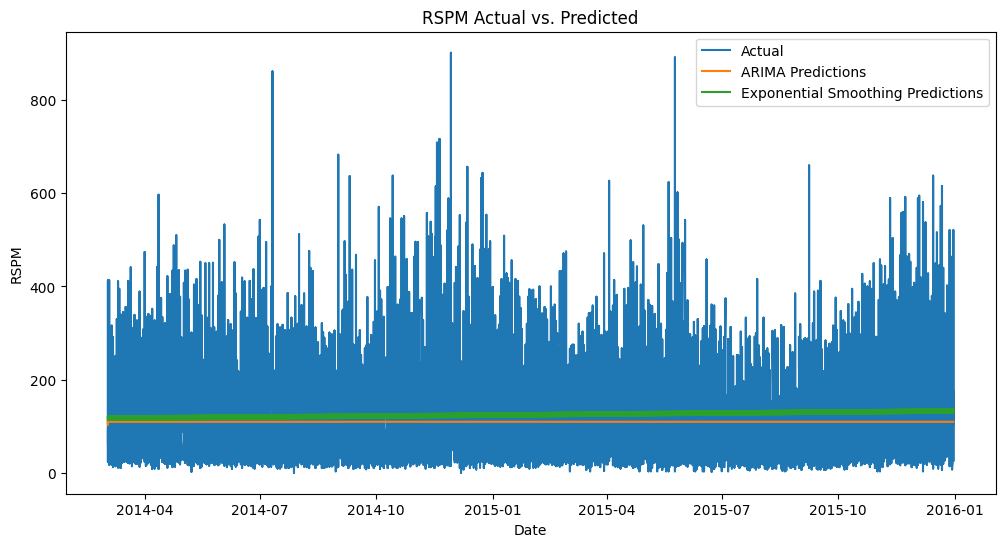

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Ensure test_df has the date index
test_df = test_df.set_index('date')

# Make predictions with ARIMA model
# The forecast method requires the start and end index for prediction.
# Use the index of the test_df for forecasting.
arima_predictions = arima_model_fit.forecast(steps=len(test_df))

# Make predictions with Exponential Smoothing model
# The forecast method requires the number of steps to forecast.
es_predictions = es_model_fit.forecast(steps=len(test_df))


# Calculate MAE and RMSE for ARIMA
arima_mae = mean_absolute_error(test_df['rspm'], arima_predictions)
arima_rmse = np.sqrt(mean_squared_error(test_df['rspm'], arima_predictions))

# Calculate MAE and RMSE for Exponential Smoothing
es_mae = mean_absolute_error(test_df['rspm'], es_predictions)
es_rmse = np.sqrt(mean_squared_error(test_df['rspm'], es_predictions))

print(f"ARIMA MAE: {arima_mae}")
print(f"ARIMA RMSE: {arima_rmse}")
print(f"Exponential Smoothing MAE: {es_mae}")
print(f"Exponential Smoothing RMSE: {es_rmse}")

# Generate forecast plot
plt.figure(figsize=(12, 6))
plt.plot(test_df.index, test_df['rspm'], label='Actual')
plt.plot(test_df.index, arima_predictions, label='ARIMA Predictions')
plt.plot(test_df.index, es_predictions, label='Exponential Smoothing Predictions')
plt.xlabel('Date')
plt.ylabel('RSPM')
plt.title('RSPM Actual vs. Predicted')
plt.legend()
plt.show()

## Compare models

### Subtask:
Compare the models based on their evaluation metrics and forecast plots.


## Select and save the best model

### Subtask:
Identify the best performing model and save it for future inference.


**Reasoning**:
Compare the calculated MAE and RMSE values for the ARIMA and Exponential Smoothing models, determine which model has lower MAE and RMSE, and save the best performing model object to a file using pickle.



In [10]:
import pickle

# Compare MAE and RMSE
print(f"ARIMA MAE: {arima_mae}")
print(f"ARIMA RMSE: {arima_rmse}")
print(f"Exponential Smoothing MAE: {es_mae}")
print(f"Exponential Smoothing RMSE: {es_rmse}")

# Determine the best performing model
if arima_mae < es_mae and arima_rmse < es_rmse:
    best_model_name = "ARIMA"
    best_model_fit = arima_model_fit
    print("\nARIMA is the best performing model based on MAE and RMSE.")
elif es_mae < arima_mae and es_rmse < arima_rmse:
    best_model_name = "Exponential Smoothing"
    best_model_fit = es_model_fit
    print("\nExponential Smoothing is the best performing model based on MAE and RMSE.")
else:
    # If there is a tie or mixed results, you might want to choose based on one metric or other factors.
    # For simplicity, we'll prioritize lower RMSE in case of mixed results.
    if arima_rmse < es_rmse:
        best_model_name = "ARIMA"
        best_model_fit = arima_model_fit
        print("\nARIMA is the best performing model based on lower RMSE.")
    else:
        best_model_name = "Exponential Smoothing"
        best_model_fit = es_model_fit
        print("\nExponential Smoothing is the best performing model based on lower RMSE.")

# Save the best performing model
filename = f'{best_model_name.lower()}_model.pkl'
with open(filename, 'wb') as f:
    pickle.dump(best_model_fit, f)

print(f"\nBest performing model ({best_model_name}) saved to {filename}")

ARIMA MAE: 50.95071580608617
ARIMA RMSE: 65.90190654655576
Exponential Smoothing MAE: 57.560052641112215
Exponential Smoothing RMSE: 70.07247017209484

ARIMA is the best performing model based on MAE and RMSE.

Best performing model (ARIMA) saved to arima_model.pkl


## Consider regionalization

### Subtask:
Discuss strategies for training models per city or station if data is regionalized.


## Summary:

### Data Analysis Key Findings

*   The initial data loading required specifying 'latin1' encoding due to a `UnicodeDecodeError`.
*   Forward filling was used to handle missing values, although initial `NaN`s remained in the training data, which required dropping rows for the Exponential Smoothing model.
*   Setting the 'date' column as the index for both training and test dataframes was necessary for successful time series modeling.
*   The ARIMA model (order (5, 1, 0)) and Exponential Smoothing model (additive trend and seasonal components) were successfully trained after data preparation.
*   The ARIMA model performed better than the Exponential Smoothing model on the test data, with a lower MAE of approximately 50.95 compared to 57.56, and a lower RMSE of approximately 65.90 compared to 70.07.
*   The best-performing model, ARIMA, was saved to `arima_model.pkl`.
*   Strategies for regionalized modeling include training independent models per region, using hierarchical models, or employing transfer learning, each with its own benefits and challenges.

### Insights or Next Steps

*   Explore alternative methods for handling initial missing values in the time series data, as forward fill was insufficient for the Exponential Smoothing model.
*   Further hyperparameter tuning of the ARIMA and Exponential Smoothing models could potentially improve their performance. Consider evaluating other time series models as well.
